# Телекоммуникации

## Описание проекта:

Заказчик – оператор свзяи. Нужно построить модель, которая будет предсказывать отток клиентов, чтобы простимулировать их остаться.

### В нашем распоряжение такие данные:

#### Таблица contract – информация о договоре
customerID — ID абонента

BeginDate — дата начала действия договора

EndDate — дата окончания действия договора

Type — тип оплаты: раз в год-два или ежемесячно

PaperlessBilling — электронный расчётный лист

PaymentMethod — тип платежа

MonthlyCharges — расходы за месяц

TotalCharges — общие расходы абонента.

#### Таблица personal – персональные данные клиента
customerID — ID пользователя

gender — пол

SeniorCitizen — является ли абонент пенсионером

Partner — есть ли у абонента супруг или супруга

Dependents — есть ли у абонента дети.

####Таблица internet – информация об интернет-услугах
customerID — ID пользователя

InternetService — тип подключения

OnlineSecurity — блокировка опасных сайтов

OnlineBackup — облачное хранилище файлов для резервного копирования данных

DeviceProtection — антивирус

TechSupport — выделенная линия технической поддержки

StreamingTV — стриминговое телевидение

StreamingMovies — каталог фильмов.

####Таблица phone – информация об услугах телефонии
customerID — ID пользователя

MultipleLines — подключение телефона к нескольким линиям одновременно.

#### P.S.
Во всех файлах столбец customerID содержит код клиента.

Информация актуальна на 1 февраля 2020



<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Хорошее введение
    
</div>


## Планы работы:

**1** Загрузка и анализ данных

1.   Загрузка данных
2.   Поиск пропусков/дубликатов
3.   Просмотр распределения некоторых признаков

**2** Обработка и подготовка данных для обучения

1.   Объеденение таблиц
2.   Просмотр корреляции
3.   Заполнение пропусков
4.   Создание целевого признака (ушёл клиент или нет)
5.   Создание дополнительных признаков
6.   Разделение на обучающую и тестувую выборки (test_size=0.25)
7.   Кодирование данных для обучения (только для дерева решений, у остальных моделей есть свои алгоритмы – они предварительного кодирования не требуют.)

**3** Обучение моделей

Для крос-валидации и лучшего подбора признаков буду использовать GridSearch
Буду использовать эти модели: Дерево решений, CatBoost, LGBM

**4** Анализ моделей, тестирование лучшей из них

Сравниваю время обучения, а также точность метрики roc_auc. Модель, которая покажет лучший результат, отправится на тест, где должна будет превысить порог в 0.85

**5** Отчёт по проекту

Отчёт буду составлять по этому плану, с добавлением пунктов про признаки для обучения и описания выбранной модели.


## Импорт библиотек

In [ ]:
## Для работы с данными:
# Импортируем pandas как pd:
import pandas as pd
# Импортируем numpy как np:
import numpy as np


## Импорт библиотек для граффиков:
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly
import plotly.graph_objects as go
import seaborn as sns
!pip install phik
import phik

# Импорт моделей:
# Импорт CatBoost:
!pip install catboost
from catboost import CatBoostClassifier
# Импорт LightGBM
!pip install lightgbm
import lightgbm
from lightgbm import LGBMClassifier
# Импорт дерева решений
from sklearn.tree import DecisionTreeClassifier
# Импорт оптимизатора для обучения и кросс-валидации:
from sklearn.model_selection import GridSearchCV

# Импорт метрик
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

# Импорт метода для создания выборок:
# Для разделения:
from sklearn.model_selection import train_test_split
# Для кодирования
from sklearn.preprocessing import OrdinalEncoder

# Для загрузки файлов(у меня):
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00
Mounted at /content/drive


## Загрузка данных

In [ ]:
# Загружаем таблицу personal_new:
try:
    personal_new = pd.read_csv('/datasets/personal_new.csv')
except:
    personal_new = pd.read_csv("/content/drive/MyDrive/For_data/Final_project/personal_new.csv")

# Загружаем таблицу contract_new:
try:
    contract_new = pd.read_csv('/datasets/contract_new.csv')
except:
    contract_new = pd.read_csv("/content/drive/MyDrive/For_data/Final_project/contract_new.csv")

# Загружаем таблицу internet_new:
try:
    internet_new = pd.read_csv('/datasets/internet_new.csv')
except:
    internet_new = pd.read_csv("/content/drive/MyDrive/For_data/Final_project/internet_new.csv")

# Загружаем таблицу phone_new:
try:
    phone_new = pd.read_csv('/datasets/phone_new.csv')
except:
    phone_new = pd.read_csv("/content/drive/MyDrive/For_data/Final_project/phone_new.csv")

## Анализ данных

### Создание функции для просмотра информации

In [ ]:
def information(data):
    print('Общая информация о таблице:')
    print(data.info(), '\n')
    display(data.head())
    print('Размер таблицы равен:', data.shape, '\n')
    print('Кол-во пропусков:', data.isna().sum(), '\n')
    print('Кол-во явных дубликатов:', data.duplicated().sum(), '\n')
    print('Статистические данные:')
    display(data.describe())

### Таблица contract_new

In [ ]:
information(contract_new)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None 



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Размер таблицы равен: (7043, 8) 

Кол-во пропусков: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64 

Кол-во явных дубликатов: 0 

Статистические данные:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Text(0.5, 1.0, 'Расходы за месяц')

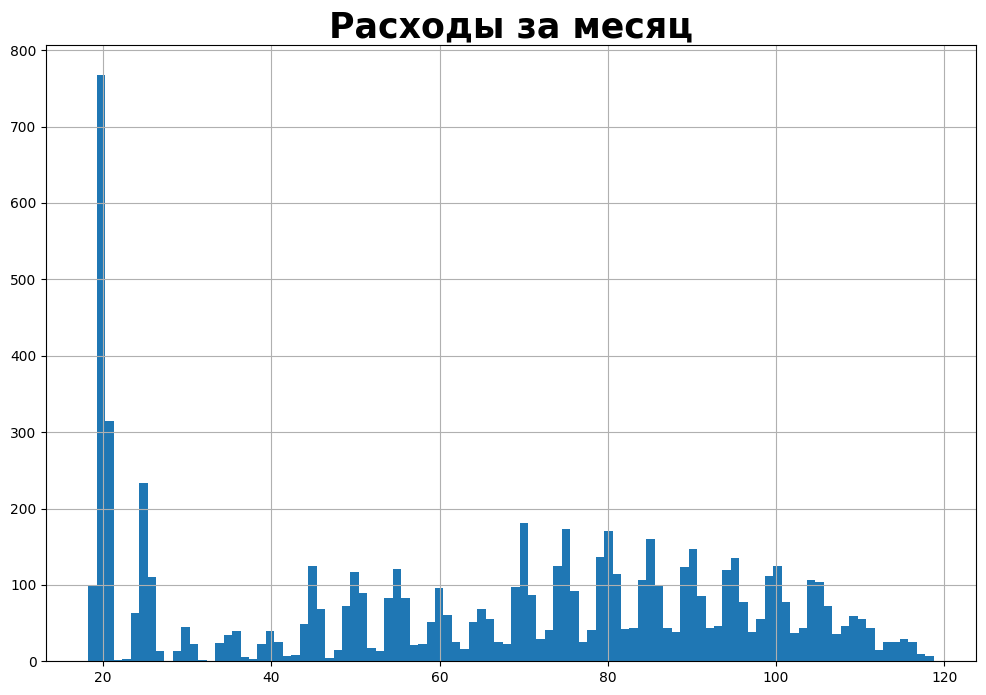

In [ ]:
contract_new['MonthlyCharges'].hist(bins=100, figsize=(12,8), grid=True)
plt.title(label='Расходы за месяц', loc='center', fontsize=25, fontweight='bold')

In [ ]:
contract_new[contract_new['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [ ]:
contract_new[contract_new['TotalCharges'] == ' '].count()

customerID          11
BeginDate           11
EndDate             11
Type                11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
dtype: int64

In [ ]:
contract_new_total_charges = contract_new[contract_new['TotalCharges'] != ' ']

In [ ]:
contract_new_total_charges['TotalCharges'] = contract_new_total_charges['TotalCharges'].astype(float)

<ipython-input-9-a17413a82da7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new_total_charges['TotalCharges'] = contract_new_total_charges['TotalCharges'].astype(float)


Text(0.5, 1.0, 'Общие расходы пользователя')

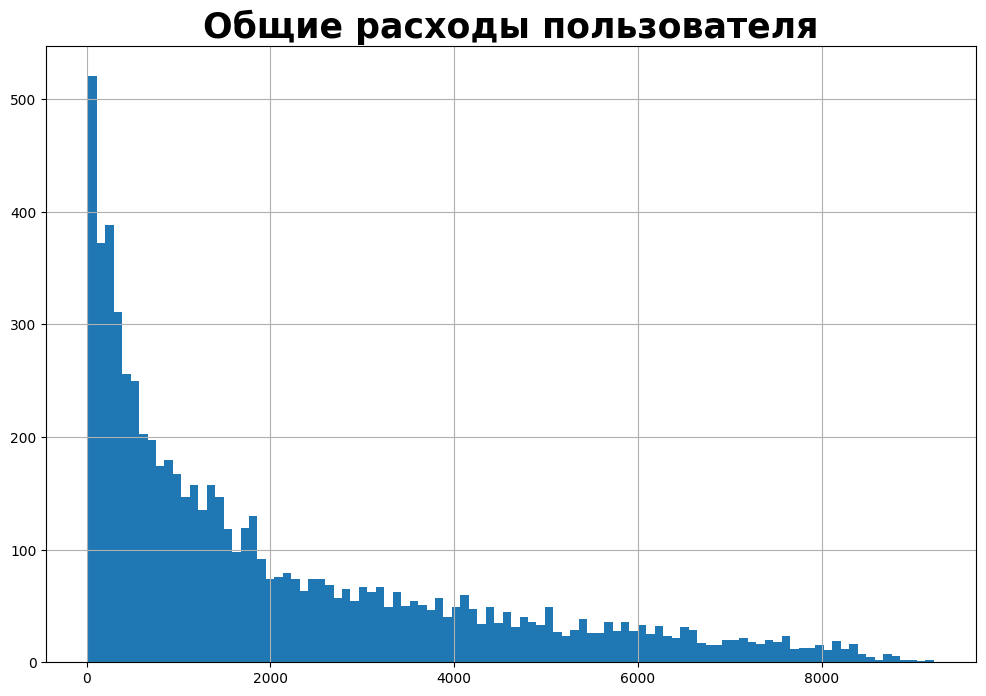

In [ ]:
contract_new_total_charges['TotalCharges'].hist(bins=100, figsize=(12,8))
plt.title(label='Общие расходы пользователя', loc='center', fontsize=25, fontweight='bold')

[Text(0, 0, '55.0%'), Text(0, 0, '24.1%'), Text(0, 0, '20.9%')]

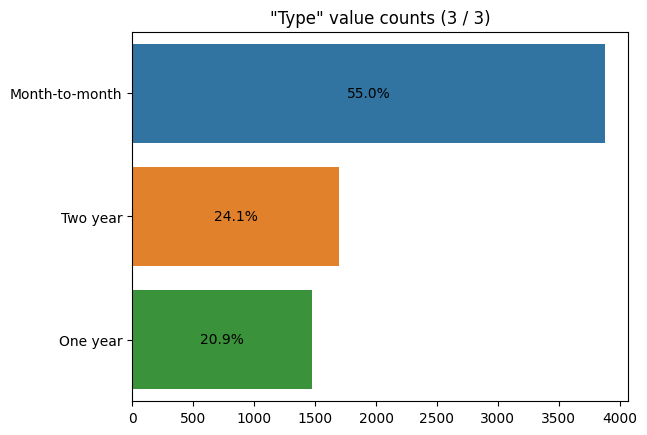

In [ ]:
val_counts = contract_new['Type'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(contract_new['Type'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '59.2%'), Text(0, 0, '40.8%')]

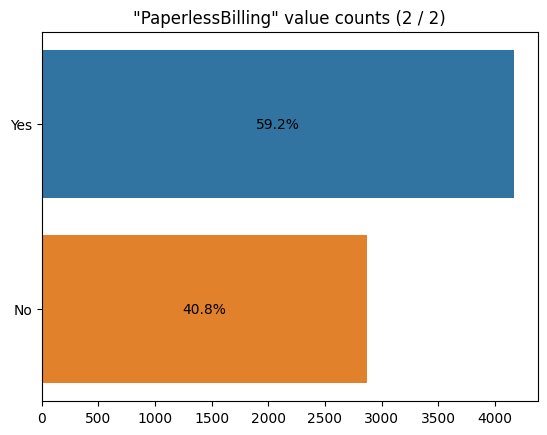

In [ ]:
val_counts = contract_new['PaperlessBilling'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(contract_new['PaperlessBilling'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '33.6%'),
 Text(0, 0, '22.9%'),
 Text(0, 0, '21.9%'),
 Text(0, 0, '21.6%')]

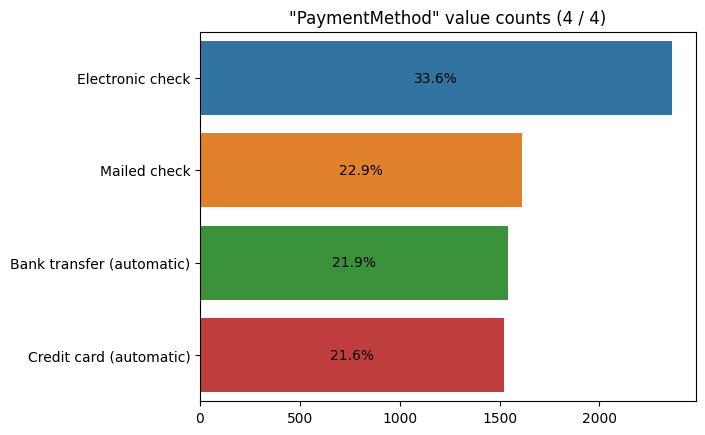

In [ ]:
val_counts = contract_new['PaymentMethod'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(contract_new['PaymentMethod'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '84.4%'),
 Text(0, 0, '0.6%'),
 Text(0, 0, '0.5%'),
 Text(0, 0, '0.5%'),
 Text(0, 0, '0.5%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%'),
 Text(0, 0, '0.4%')]

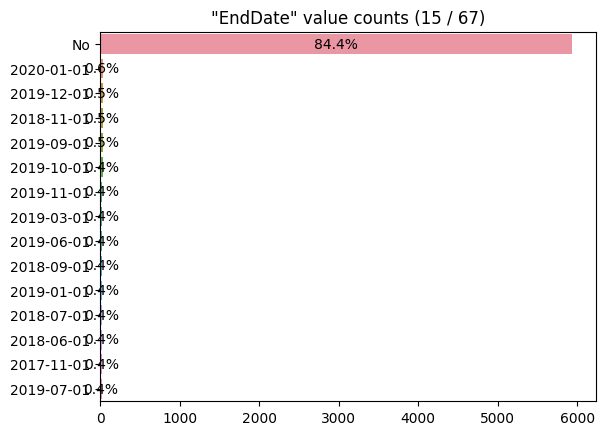

In [ ]:
val_counts = contract_new['EndDate'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(contract_new['EndDate'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

#### Вывод по таблице contract_new:

В данной таблице 7043 строк.

Явных дубликатов как и пропусков нет, кроме столбца total_charges. В нём ес.  пропущенные значения в виде ' ', в этих строках находятся пользователи, которые используют услуги данного оператора меньше месяца. (считаю во время предобработки удалить данных пользователей ткк их всего 11).

Данные распределены нормально.

84.4% клиентов всё ещё являлись пользователями услуг нашего сервеса

Есть пики на графиках трат пользователей – большая часть пользователей тратит около 20 рублей в месяц, а также меньше 1000 в целом

Также 55% абонентов платит ежемесячно, остальные распределены так: 25% платит за весь год, оставшиеся 20% за 2 года сразу.

### Таблица personal_new

In [ ]:
information(personal_new)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None 



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Размер таблицы равен: (7043, 5) 

Кол-во пропусков: customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64 

Кол-во явных дубликатов: 0 

Статистические данные:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


[Text(0, 0, '50.5%'), Text(0, 0, '49.5%')]

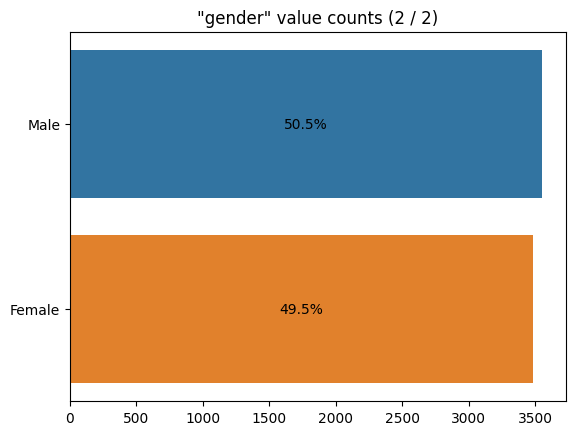

In [ ]:
val_counts = personal_new['gender'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(personal_new['gender'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '83.8%'), Text(0, 0, '16.2%')]

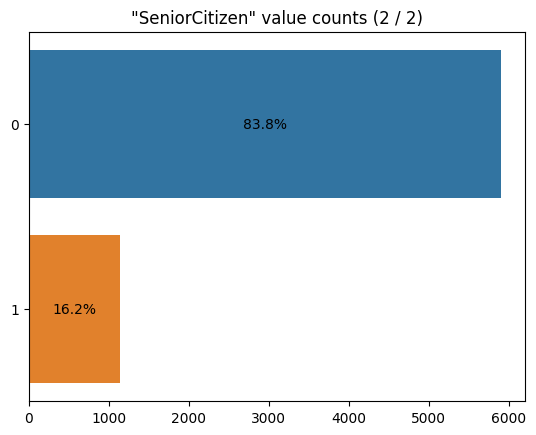

In [ ]:
val_counts = personal_new['SeniorCitizen'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(personal_new['SeniorCitizen'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '51.7%'), Text(0, 0, '48.3%')]

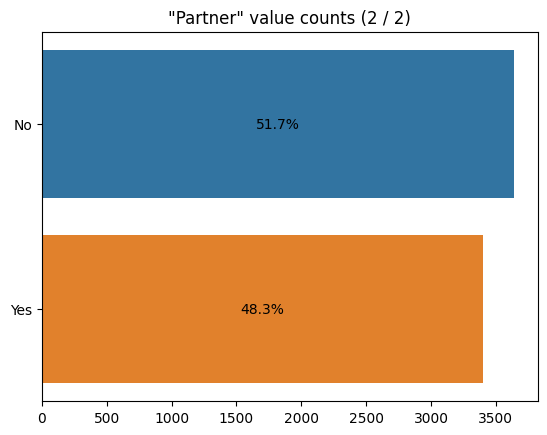

In [ ]:
val_counts = personal_new['Partner'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(personal_new['Partner'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '70.0%'), Text(0, 0, '30.0%')]

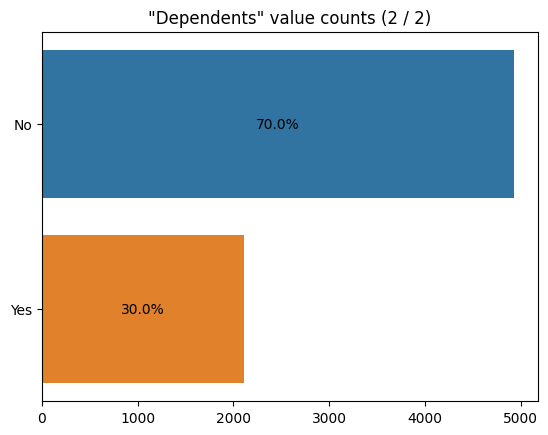

In [ ]:
val_counts = personal_new['Dependents'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(personal_new['Dependents'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

#### Вывод по personal_new:

В этой таблице 7043 строк.

Пропусков и явных дубликатов нет.

Все данные бинарные, их значимость проверим графиком корреляции уже после объедения таблицы.

### Таблица internet_new

In [ ]:
information(internet_new)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None 



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Размер таблицы равен: (5517, 8) 

Кол-во пропусков: customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64 

Кол-во явных дубликатов: 0 

Статистические данные:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


[Text(0, 0, '56.1%'), Text(0, 0, '43.9%')]

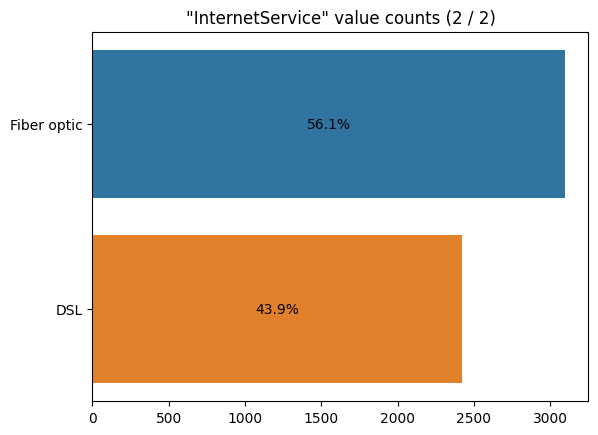

In [ ]:
val_counts = internet_new['InternetService'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['InternetService'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '63.4%'), Text(0, 0, '36.6%')]

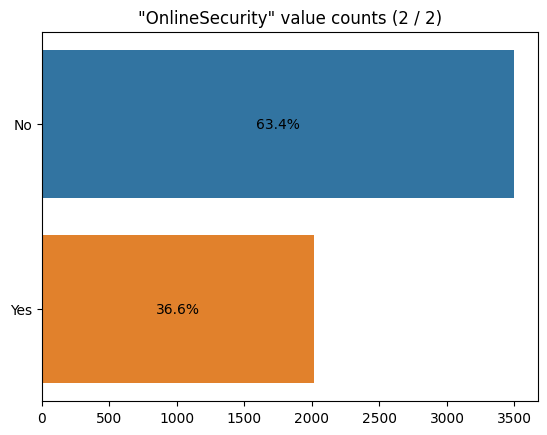

In [ ]:
val_counts = internet_new['OnlineSecurity'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['OnlineSecurity'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '56.0%'), Text(0, 0, '44.0%')]

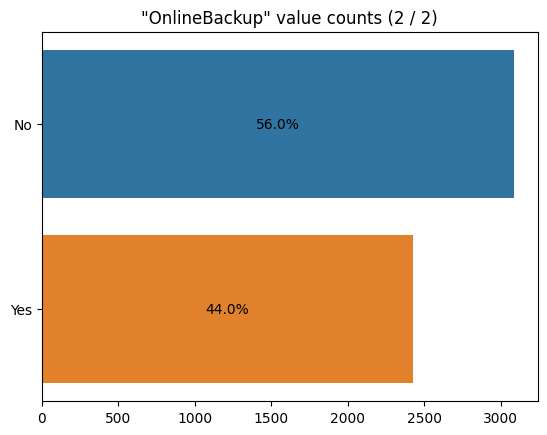

In [ ]:
val_counts = internet_new['OnlineBackup'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['OnlineBackup'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '56.1%'), Text(0, 0, '43.9%')]

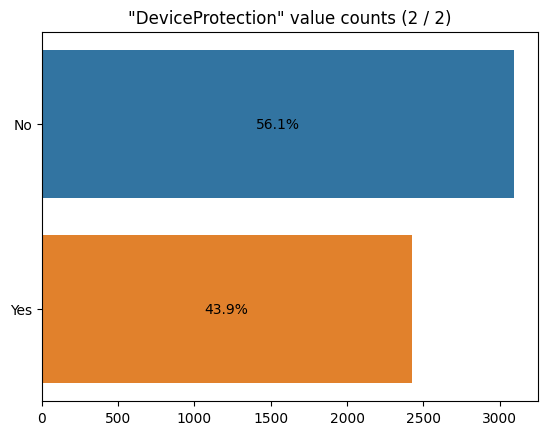

In [ ]:
val_counts = internet_new['DeviceProtection'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['DeviceProtection'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '63.0%'), Text(0, 0, '37.0%')]

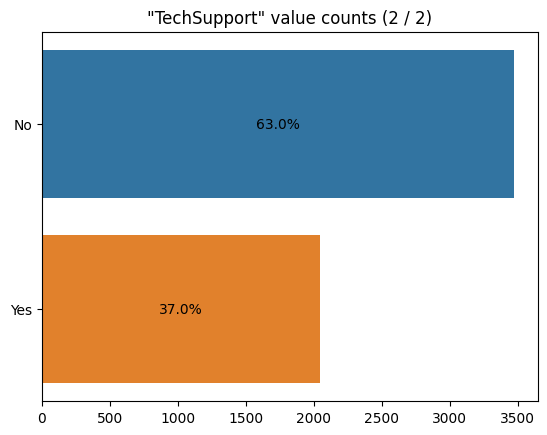

In [ ]:
val_counts = internet_new['TechSupport'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['TechSupport'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '50.9%'), Text(0, 0, '49.1%')]

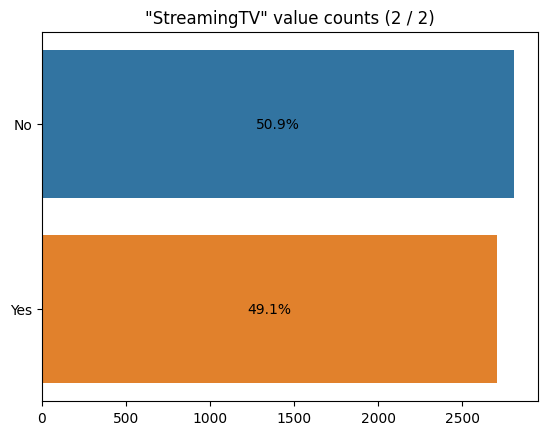

In [ ]:
val_counts = internet_new['StreamingTV'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['StreamingTV'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

[Text(0, 0, '50.5%'), Text(0, 0, '49.5%')]

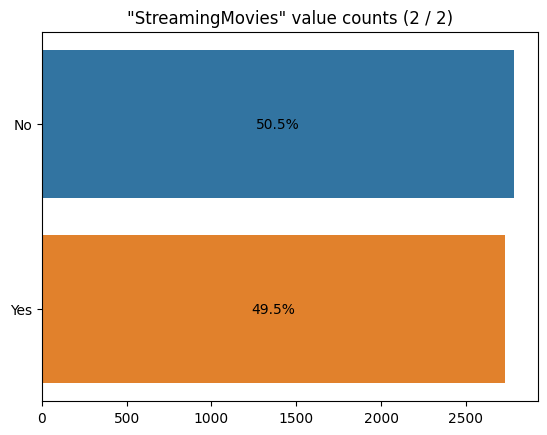

In [ ]:
val_counts = internet_new['StreamingMovies'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(internet_new['StreamingMovies'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

### Вывод по таблице internet_new:

В данной таблице 5517 строк

Явных дубликатов и пропусков нет

Все данные являются бинарными

Данные в столбцах OnlineSecurity и TechSupport относятся 2 к 1 друг к другу, В остальных распределение близко к 1 к 1.

### Таблица phone_new

In [ ]:
information(phone_new)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None 



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Размер таблицы равен: (6361, 2) 

Кол-во пропусков: customerID       0
MultipleLines    0
dtype: int64 

Кол-во явных дубликатов: 0 

Статистические данные:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


[Text(0, 0, '53.3%'), Text(0, 0, '46.7%')]

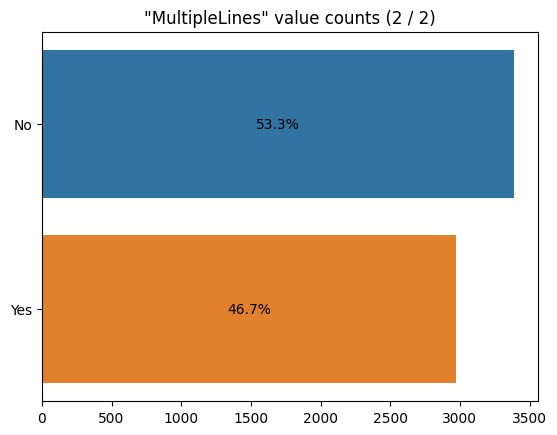

In [ ]:
val_counts = phone_new['MultipleLines'].value_counts()
bar_values = val_counts.values[:15]
bar_labels = val_counts.index[:15].astype('str')
ax = sns.barplot(x=bar_values, y=bar_labels)
ax.set(title='"{}" value counts ({} / {})'.format(phone_new['MultipleLines'].name, len(bar_labels), val_counts.shape[0]))
labels = [f'{w/val_counts.values.sum()*100:0.1f}%'
                        if (w := v.get_width()) > 0 else '' for v in ax.containers[0]]
plt.bar_label(ax.containers[0], labels=labels, label_type='center')

### Вывод по таблице phone_new:
В этой таблице 6361, в ней нет пропусков и явных дубликатов.

Пользуются услугой мультиканальности 46.7% пользователей.

### Общий вывод по данным:

Данные загружены успешно.

Выбросов, пропусков, явных дубликатов – нет

Размер некоторых таблиц отличаются друг от друга, после объеденения появятся пропуски.

Данные распределены нормально.

Из интересных замечаниц, можно отметить, что дата указана помесячно.

## Подготовка данных

### Создание признаков:

#### Целевой признак: end_or_no
Так как нам надо предсказывать уйдёт-ли клиент, то целевым признаком будет являться: клиент ушёл/ клиент всё ещё пользуется услугами нашей компании.

#### Создание дополнительных признаков: days
Я считаю, что количество времени, которое клиент является пользователем услуг, т.е. с даты начала действия договора до окончания, будет отличным признаком.

Ткк у большинства пользователей контракт всё ещё действовал на момент сбора данных, чтобы не 'додумывать' мы заменем No на дату актуальности данных 1 февраля 2020

Данные в столбце будут в виде количества дней.

In [ ]:
# Создание столбца для целевого признака:
contract_new['end_or_no'] = ""

In [ ]:
# Заполнение столбца – Yes если пользователь ушёл, NO если нет.
for i in range(contract_new['EndDate'].count()):
  if contract_new.at[i, 'EndDate'] == 'No':
    contract_new.at[i,'end_or_no'] = 0
  else:
    contract_new.at[i,'end_or_no'] = 1
# Проверка:
#contract_new

In [ ]:
# Замена отсутсвия даты на последнюю из возможных:
contract_new.loc[contract_new['EndDate'] == 'No','EndDate']  = '2020-02-01'

In [ ]:
# Замена типа данных на datetime64:
contract_new['EndDate'] = contract_new['EndDate'].astype('datetime64')
contract_new['BeginDate'] = contract_new['BeginDate'].astype('datetime64')
#contract_new['BeginDate']
#contract_new['EndDate']

In [ ]:
contract_new['days'] =(contract_new['EndDate'] - contract_new['BeginDate']) / np.timedelta64 ( 1 , 'D')
contract_new['days'].describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: days, dtype: float64

In [ ]:
# Возращаем тип данных object для кодирования
contract_new['BeginDate'] = contract_new['BeginDate'].astype('object')
# # Проверка:
# information(contract_new)

In [ ]:
# Вывод количества пропусков.
contract_new[contract_new['days']==0]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,end_or_no,days
488,4472-LVYGI,2020-02-01 00:00:00,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0,0.0
753,3115-CZMZD,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,20.25,,0,0.0
936,5709-LVOEQ,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,80.85,,0,0.0
1082,4367-NUYAO,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,25.75,,0,0.0
1340,1371-DWPAZ,2020-02-01 00:00:00,2020-02-01,Two year,No,Credit card (automatic),56.05,,0,0.0
3331,7644-OMVMY,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,19.85,,0,0.0
3826,3213-VVOLG,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,25.35,,0,0.0
4380,2520-SGTTA,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,20.00,,0,0.0
5218,2923-ARZLG,2020-02-01 00:00:00,2020-02-01,One year,Yes,Mailed check,19.70,,0,0.0
6670,4075-WKNIU,2020-02-01 00:00:00,2020-02-01,Two year,No,Mailed check,73.35,,0,0.0


Что логично это те самые 11 пользователей, которые заключили контракт в день сбора данных, мы их удалим ткк про них у нас мало информации, и их всего 11, что не сильно скажется на размере всего датасета. (Удалим после присойденения других таблиц)

### Объеденение таблиц

Так как нам надо оставить в датасете как можно больше данных, то мы соеденим с помощью merge(how='outer') так данные не потеряются, но появятся пропуски

In [ ]:
# Объеденение таблиц:
data = (contract_new.merge(phone_new, how='outer', on='customerID')
                    .merge(personal_new, how='outer', on='customerID')
                    .merge(internet_new, how='outer', on='customerID'))

In [ ]:
# Удаляем 11 пользователей:
data = data[data['days']!=0]
# Проверка:
display(data)
data[data['days']==0]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,end_or_no,days,...,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31.0,...,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01 00:00:00,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036.0,...,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01 00:00:00,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123.0,...,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01 00:00:00,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371.0,...,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,0,153.0,...,0,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01 00:00:00,2020-02-01,One year,Yes,Mailed check,84.80,2035.2,0,730.0,...,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01 00:00:00,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.4,0,2191.0,...,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,2019-03-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.6,0,337.0,...,0,Yes,Yes,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,2019-07-01 00:00:00,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.8,0,215.0,...,1,Yes,No,Fiber optic,No,No,No,No,No,No


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,end_or_no,days,...,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [ ]:
information(data)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   object        
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   object        
 8   end_or_no         7032 non-null   object        
 9   days              7032 non-null   float64       
 10  MultipleLines     6352 non-null   object        
 11  gender            7032 non-null   object        
 12  SeniorCitizen     7032 non-null   int64         
 13  Partner           7032 non-null   object        
 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,end_or_no,days,...,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31.0,...,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01 00:00:00,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036.0,...,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01 00:00:00,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123.0,...,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01 00:00:00,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371.0,...,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,0,153.0,...,0,No,No,Fiber optic,No,No,No,No,No,No


Размер таблицы равен: (7032, 22) 

Кол-во пропусков: customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
end_or_no              0
days                   0
MultipleLines        680
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
dtype: int64 

Кол-во явных дубликатов: 0 

Статистические данные:


,MonthlyCharges,days,SeniorCitizen
count,7032.000000,7032.000000,7032.000000
mean,64.798208,899.961320,0.162400
std,30.085974,682.738777,0.368844
min,18.250000,28.000000,0.000000
25%,35.587500,276.000000,0.000000
50%,70.350000,761.000000,0.000000
75%,89.862500,1461.000000,0.000000
max,118.750000,2314.000000,1.000000


In [ ]:
data[data['OnlineSecurity'].isna()==True]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,end_or_no,days,...,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,7469-LKBCI,2018-10-01 00:00:00,2020-02-01,Two year,No,Credit card (automatic),18.95,312.3,0,488.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8191-XWSZG,2015-10-01 00:00:00,2020-02-01,One year,No,Mailed check,20.65,1106.01,0,1584.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1680-VDCWW,2019-02-01 00:00:00,2020-02-01,One year,No,Bank transfer (automatic),19.80,237.6,0,365.0,...,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1066-JKSGK,2019-11-01 00:00:00,2020-02-01,Month-to-month,No,Mailed check,20.15,61.05,0,92.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,7310-EGVHZ,2020-01-01 00:00:00,2020-02-01,Month-to-month,No,Bank transfer (automatic),20.20,22.22,0,31.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,2015-11-01 00:00:00,2020-02-01,Two year,No,Bank transfer (automatic),20.65,1053.15,0,1553.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7019,9710-NJERN,2016-11-01 00:00:00,2020-02-01,Two year,No,Mailed check,20.15,785.85,0,1187.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7020,9837-FWLCH,2019-02-01 00:00:00,2020-02-01,Month-to-month,Yes,Electronic check,19.20,246.53,0,365.0,...,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7030,0871-OPBXW,2019-12-01 00:00:00,2020-02-01,Month-to-month,Yes,Mailed check,20.05,40.1,0,62.0,...,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски появились из таблиц internet – с дополнительными интернет услугами и phone – с дополнительной услугой: подключение к нескольким линиям одновременно.

Предпологаю, что пропуски появились из-за того, что пользователи не пользуются данными услугами и их просто не внесли в базу данных с показателем 'No'.

Поэтому заменим все пропуски на 'No'

In [ ]:
data.fillna('No', inplace=True)

In [ ]:
print('Кол-во пропусков:', data.isna().sum())

Кол-во пропусков: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
end_or_no           0
days                0
MultipleLines       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [ ]:
data.dtypes

customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
end_or_no                    int64
days                       float64
MultipleLines               object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
dtype: object

Пропусков больше нет.

Построим график корреляции, чтобы понять какие признаки оставить для обучения:

In [ ]:
#КОД МЕНТОРА

data = data.drop(["BeginDate", "EndDate", "customerID"], axis=1)

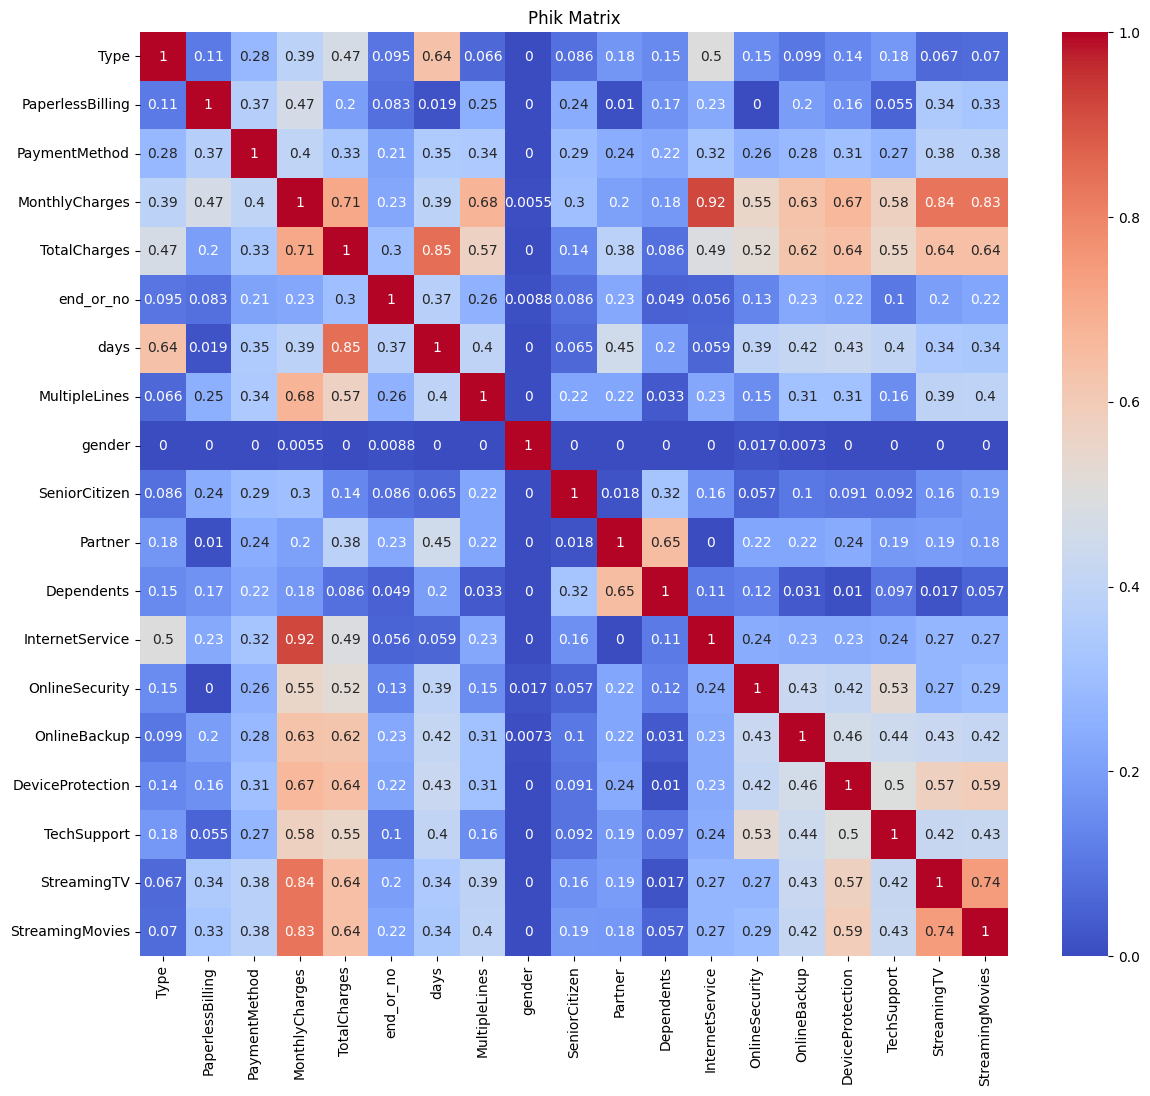

In [ ]:
phik_matrix = data.phik_matrix(interval_cols=['MonthlyCharges', 'days', 'TotalCharges'])
plt.figure(figsize=(14, 12))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Matrix')
plt.show()

Считаю, что нужно удалить прзнаки, у которых корреляция с целевым признаком <20%, к ним относятся: Gender, TechSupport, OnlineSecurity, InternetService, Dependents, SeniorCitizen, PaperlessBilling, Type.

Также нужно удалить столбцы customerID, BeginDate и EndDate – ведь они приведут к утечке целевого признака.

In [ ]:
data.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'end_or_no', 'days', 'MultipleLines', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

Создаём таблицу с выбранными признаками включая целевой

In [ ]:
demo_attribute = data[[ 'PaymentMethod', 'MonthlyCharges',
                       'TotalCharges', 'end_or_no', 'days', 'MultipleLines',
                       'Partner','OnlineBackup', 'DeviceProtection',
                       'StreamingTV', 'StreamingMovies']]

In [ ]:
demo_attribute.dtypes

PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
end_or_no             int64
days                float64
MultipleLines        object
Partner              object
OnlineBackup         object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
dtype: object

Можно увидеть, что столбец TotalCharges имеет тип object, хотя нам находятся числа, это может привести к ошибке во время обучения, сменим тип данных на численный float:

In [ ]:
demo_attribute['TotalCharges'] = demo_attribute['TotalCharges'].astype(float)

<ipython-input-49-9bdc7f7fc748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_attribute['TotalCharges'] = demo_attribute['TotalCharges'].astype(float)


In [ ]:
# Проверка:
demo_attribute.dtypes

PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
end_or_no             int64
days                float64
MultipleLines        object
Partner              object
OnlineBackup         object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
dtype: object

### Разделяем на выборки:

In [ ]:
# Создание переменной с целевым признаком:
target = demo_attribute['end_or_no']
# Создание переменной с признаками(особенностями):
features = demo_attribute.drop(['end_or_no'], axis=1)
#features
#target

In [ ]:
# Разделение исходных данных на выборку для обучения 75%, и 25% для теста:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size=0.25, random_state=16102023)

In [ ]:
information(features_train)

Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 385 to 5629
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaymentMethod     5274 non-null   object 
 1   MonthlyCharges    5274 non-null   float64
 2   TotalCharges      5274 non-null   float64
 3   days              5274 non-null   float64
 4   MultipleLines     5274 non-null   object 
 5   Partner           5274 non-null   object 
 6   OnlineBackup      5274 non-null   object 
 7   DeviceProtection  5274 non-null   object 
 8   StreamingTV       5274 non-null   object 
 9   StreamingMovies   5274 non-null   object 
dtypes: float64(3), object(7)
memory usage: 453.2+ KB
None 



,PaymentMethod,MonthlyCharges,TotalCharges,days,MultipleLines,Partner,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies
385,Mailed check,19.95,259.35,396.0,No,Yes,No,No,No,No
3026,Electronic check,84.95,1444.15,518.0,Yes,Yes,No,No,Yes,No
3223,Credit card (automatic),29.80,89.40,92.0,No,Yes,Yes,No,No,No
1311,Credit card (automatic),45.10,1913.14,1279.0,No,Yes,Yes,Yes,No,Yes
3422,Bank transfer (automatic),58.35,4084.50,2132.0,No,No,No,Yes,Yes,Yes


Размер таблицы равен: (5274, 10) 

Кол-во пропусков: PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
days                0
MultipleLines       0
Partner             0
OnlineBackup        0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
dtype: int64 

Кол-во явных дубликатов: 30 

Статистические данные:


,MonthlyCharges,TotalCharges,days
count,5274.000000,5274.000000,5274.000000
mean,64.973237,2115.342179,895.728290
std,29.966305,2100.950014,679.062598
min,18.250000,19.050000,28.000000
25%,38.312500,438.255000,276.000000
50%,70.400000,1366.060000,761.000000
75%,89.887500,3214.247500,1432.000000
max,118.750000,9221.380000,2314.000000


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaymentMethod     7032 non-null   object 
 1   MonthlyCharges    7032 non-null   float64
 2   TotalCharges      7032 non-null   float64
 3   days              7032 non-null   float64
 4   MultipleLines     7032 non-null   object 
 5   Partner           7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   StreamingTV       7032 non-null   object 
 9   StreamingMovies   7032 non-null   object 
dtypes: float64(3), object(7)
memory usage: 604.3+ KB


In [ ]:
# Создание переменной с названием столбцов для кодирования:
for_encode_columns = features_train.select_dtypes("object").columns.to_list()
for_encode_columns

['PaymentMethod',
 'MultipleLines',
 'Partner',
 'OnlineBackup',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
# Смена типа данных на категориальный
features_train[for_encode_columns] = features_train[for_encode_columns].astype('category')
# Проверка:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 385 to 5629
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PaymentMethod     5274 non-null   category
 1   MonthlyCharges    5274 non-null   float64 
 2   TotalCharges      5274 non-null   float64 
 3   days              5274 non-null   float64 
 4   MultipleLines     5274 non-null   category
 5   Partner           5274 non-null   category
 6   OnlineBackup      5274 non-null   category
 7   DeviceProtection  5274 non-null   category
 8   StreamingTV       5274 non-null   category
 9   StreamingMovies   5274 non-null   category
dtypes: category(7), float64(3)
memory usage: 201.8 KB


In [ ]:
# Кодировщик:
encoder = OrdinalEncoder()

features_train_oe = features_train.copy()
features_test_oe = features_test.copy()

# Кодируем данные
features_train_oe[for_encode_columns] = encoder.fit_transform(features_train[for_encode_columns])
features_test_oe[for_encode_columns] = encoder.transform(features_test[for_encode_columns])

# Проверка
features_train_oe

,PaymentMethod,MonthlyCharges,TotalCharges,days,MultipleLines,Partner,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies
385,3.0,19.95,259.35,396.0,0.0,1.0,0.0,0.0,0.0,0.0
3026,2.0,84.95,1444.15,518.0,1.0,1.0,0.0,0.0,1.0,0.0
3223,1.0,29.80,89.40,92.0,0.0,1.0,1.0,0.0,0.0,0.0
1311,1.0,45.10,1913.14,1279.0,0.0,1.0,1.0,1.0,0.0,1.0
3422,0.0,58.35,4084.50,2132.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2418,0.0,86.45,2544.22,822.0,1.0,0.0,1.0,1.0,0.0,0.0
4807,1.0,116.15,4107.06,1036.0,1.0,0.0,1.0,1.0,1.0,1.0
1805,1.0,64.45,1826.51,790.0,1.0,1.0,1.0,1.0,0.0,0.0
510,1.0,94.30,1886.00,610.0,0.0,1.0,0.0,1.0,0.0,1.0


## Работа с моделями

### LightGBM:

In [ ]:
params_for_lgbm = {'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
          'n_estimators': [100, 200, 300],
          'num_leaves': [7, 14, 21, 28, 50, 75, 100, 151]
          }
lgb = LGBMClassifier(random_state = 161023)
lgb_grid_clf = GridSearchCV(lgb, param_grid=params_for_lgbm, scoring='roc_auc')
lgb_grid_clf.fit(features_train, target_train)
#, categorical_feature=['PaymentMethod', 'MultipleLines',
#                        'Partner','OnlineBackup', 'DeviceProtection',
#                        'StreamingTV', 'StreamingMovies'])

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(estimator=LGBMClassifier(random_state=161023),
             param_grid={'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [7, 14, 21, 28, 50, 75, 100, 151]},
             scoring='roc_auc')

In [ ]:
# Вывод лучших параметров:
print('Параметры модели:', lgb_grid_clf.best_params_)
# Вывод результата:
lgb_grid_clf.best_score_

Параметры модели: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 14}


0.8876198711083289

### Дерево решений

In [ ]:
# Параметр для модели(перебор):
parameters = {'max_depth':range(1,21,1),}
# Инициализация модели:
model_tree = DecisionTreeClassifier(random_state=161023)
# Подбор гипперпараметров:
model_tree_grid_clf = GridSearchCV(model_tree, param_grid = parameters, scoring='roc_auc')
# Обучение модели:
model_tree_grid_clf.fit(features_train_oe, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=161023),
             param_grid={'max_depth': range(1, 21)}, scoring='roc_auc')

In [ ]:
# Вывод параметров:
print('Параметры модели:',model_tree_grid_clf.best_params_)
# Вывод результата:
model_tree_grid_clf.best_score_

Параметры модели: {'max_depth': 6}


0.7767836056609896

### CatBoost

In [ ]:
cat = CatBoostClassifier(random_state = 161023)
params_for_cat = {
    'learning_rate': [0.5, 0.1, 0.05, 0.001],
    'max_depth': [-1, 3, 5, 10],
    'n_estimators': [50, 150, 300, 400, 500]
}
cat_grid = GridSearchCV(cat, param_grid=params_for_cat, scoring='roc_auc')
cat_grid.fit(features_train, target_train, cat_features=['PaymentMethod', 'MultipleLines',
                       'Partner','OnlineBackup', 'DeviceProtection',
                       'StreamingTV', 'StreamingMovies'], verbose=50)

0:	learn: 0.4974312	total: 49.6ms	remaining: 2.43s
49:	learn: 0.3182159	total: 113ms	remaining: 0us
0:	learn: 0.4997395	total: 1.48ms	remaining: 72.3ms
49:	learn: 0.3179346	total: 75.6ms	remaining: 0us
0:	learn: 0.4963491	total: 1.44ms	remaining: 70.6ms
49:	learn: 0.3088421	total: 71.7ms	remaining: 0us
0:	learn: 0.4973806	total: 1.56ms	remaining: 76.6ms
49:	learn: 0.3193305	total: 67.3ms	remaining: 0us
0:	learn: 0.5014892	total: 1.65ms	remaining: 80.9ms
49:	learn: 0.2966170	total: 66.8ms	remaining: 0us
0:	learn: 0.4974312	total: 1.35ms	remaining: 202ms
50:	learn: 0.3162253	total: 66.1ms	remaining: 128ms
100:	learn: 0.2820098	total: 144ms	remaining: 69.9ms
149:	learn: 0.2587853	total: 209ms	remaining: 0us
0:	learn: 0.4997395	total: 1.66ms	remaining: 248ms
50:	learn: 0.3174718	total: 69.9ms	remaining: 136ms
100:	learn: 0.2758137	total: 148ms	remaining: 71.7ms
149:	learn: 0.2505830	total: 214ms	remaining: 0us
0:	learn: 0.4963491	total: 4.02ms	remaining: 599ms
50:	learn: 0.3085138	total: 1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2303, in _fit
  

50:	learn: 0.2530837	total: 278ms	remaining: 1.36s
100:	learn: 0.1863743	total: 943ms	remaining: 1.86s
150:	learn: 0.1624357	total: 1.67s	remaining: 1.65s
200:	learn: 0.1435126	total: 2.4s	remaining: 1.18s
250:	learn: 0.1286745	total: 2.95s	remaining: 577ms
299:	learn: 0.1151607	total: 3.51s	remaining: 0us


GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7ea69e045bd0>,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.001],
                         'max_depth': [-1, 3, 5, 10],
                         'n_estimators': [50, 150, 300, 400, 500]},
             scoring='roc_auc')

In [ ]:
# Вывод параметров:
print('Параметры модели:',cat_grid.best_params_)
# Вывод результата:
cat_grid.best_score_

Параметры модели: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}


0.9183823588324321

### Вывод по моделям:

Лучший результат покозала модель CatBoost, метрика roc_auc = 0.918, а также скорость обучения составила: 14 минут 30 секунд

Дерево решений показало худший показатель метрики: 0.77678, но обучение составило всего 6 секунд.

LightGBM обучалась: 3.5 минуты, но метрика roc_auc = 0.8876, что хоть и выше порога, но значительно уступает CatBoost

### Тестирование лучшей модели – CatBoost

С параметрами:
1.   learning_rate: 0.5
2.   max_depth: 3
3.   n_estimators: 300

Мы можем сделать вывод, что не всегда максимальная глубина, огромное количество итераций и маленький learning_rate приведут к лучшему результату. Модель надо остановить, чтобы не было переобучения.

### Важность признаков

Text(0.5, 1.0, 'Feature Importance')

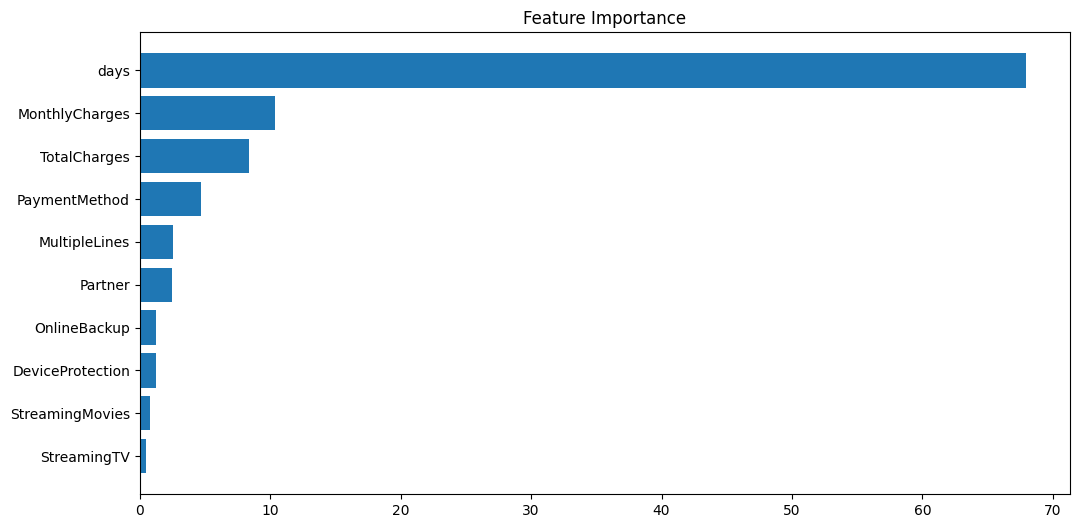

In [ ]:
feature_importance = cat_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_train.columns)[sorted_idx])
plt.title('Feature Importance')


#### Вывод:
Как мы можем заметить самым важным признаком оказался – days, т.е. кол-во дней как клиент заключил договор. Возможно люди уходят после похожего промежутка времени.

Также довольно полезными признаками являются: MonthCharges – месячные затраты, TotalCarges – то сколько пользователь потратил в целом. Что логично, ведь, пользователь, будет доволен больше или меньше в зависимости от того, как много он потратил. Плюс TotalCharges коррелирует со столбцом days, ведь чем больше дней человек является клиентом, тем больше он потратит в сумме. И PaymentMethod – возможно люди уходят при невозможности оплачивать методом, которым привыкли(например блокировка карты)

Остальные признаки не так важны для нашей модели.

### Метрика Roc-Auc на тестовой выборке

In [ ]:
# Результат:
result = roc_auc_score(target_test, cat_grid.predict_proba(features_test)[:, 1])
print('Auc_Roc score CatBoost:',result)

Auc_Roc score CatBoost: 0.9096080895140176


Наша модель прошла порог в 0.85 roc_auc score.

### Матрица ошибок:

In [ ]:
# Считаем матрицу ошибок:
cm = confusion_matrix(target_test,
                      cat_grid.predict(features_test),
                      normalize = 'true')

[Text(0.5, 1.0, 'CatBoost'),
 Text(0.5, 23.52222222222222, 'Predictions'),
 Text(113.9222222222222, 0.5, 'True')]

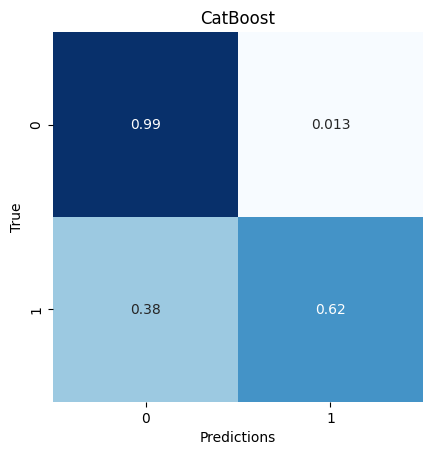

In [ ]:
# Рисуем график матрицы ошибок:
matrix = sns.heatmap(data= cm,
                     cmap='Blues',
                     annot  = True,
                     square = True,
                     cbar   = False)
matrix.set(title='CatBoost', xlabel='Predictions', ylabel='True')

По матрице ошибок мы можем сдлеать вывод, что модель с точностью 0.987 определяет клиентов, которые будут дальше пользоваться услугами телеком компании. Но при этом часто довольно часто ошибается с клиентами, которые уйдут(точность всего 0.62) – это может сведетельствовать о дисбалансе классов, а также переобучении модели

### Вывод
Наша модель CatBoost С гипперпараметрами:
1.   learning_rate: 0.5
2.   max_depth: 3
3.   n_estimators: 300

Cамыми важными признаками являются: days, MonthlyCharges, TotalCharges и PaymentMethod, остальные признаки не так важны.

Не переобучилась(результат на кросс-валидации незначительно отличается от тестового), а также преодолила необходимый порог в качестве на тестовой выборке: 0.91>0.85, но на матрице ошибок мы видим дисбаланс классов, что является правдой, в нашем датасете в разы больше пользователей, которые продолжают пользоваться услугами телеком компании.


## Отчёт по решению



Все пункты из Плана работы выполнены успешны с небольшими доработками в пункте 2 и 4:

**1** Загрузка и анализ данных – Выполнено успешно без изменений со всеми под пунктами:

1.   Загрузка данных
2.   Поиск пропусков/дубликатов – пропуски удалены, дубликатов не найдённо.
3.   Просмотр распределения некоторых признаков – данные распределенны нормально.

**2** Обработка и подготовка данных для обучения – Выполнено успешно со всеми под пунктами; Изменение в подпункте 2 и 7:

1.   Объеденение таблиц
2.   Просмотр корреляции – После этого пункта, я удалил признаки, которые коррелируют с целевым признаком ниже 20%, а также признаки, которые могут привести к утечкам целевого признака – даты
3.   Заполнение пропусков
4.   Создание целевого признака (ушёл клиент или нет) –
Создан стольец **end_or_no** – в который и помещён целевой признак
5.   Создание дополнительных признаков –
создан. признак **days** количество дней пользованием услуг оператора. Этот признак не ведёт к утечке, а также показал важность для обучения
6.   Разделение на обучающую и тестувую выборки (test_size=0.25)
7.   Кодирование данных для обучения (только для дерева решений, у остальных моделей есть свои алгоритмы – они предварительного кодирования не требуют.). **P.S.** Модели CatBoost и LightGBM действительно не требуют предварительного кодирования, но для LightGBM пришлось изменить тип данных с object на category.

**3** Обучение моделей – Выполнено усппешно и без изменений.

Для крос-валидации и лучшего подбора признаков буду использовать GridSearch
Были использованны эти модели: Дерево решений, CatBoost, LGBM

**4** Анализ моделей, тестирование лучшей из них – Выполнено успешно.

По итогу 4го пункта, выяснилось, что лучшей моделью является CatBoost classifier с такими гипперпараметрами:
1.   learning_rate: 0.5
2.   max_depth: 3
3.   n_estimators: 300

– Т.к. на обучающей выборке она показала наилучшей результат, а время о бучения между LightGBM и CatBoost разниться всего на 11 минут, но качество результата важнее.

Метрика roc_auc на тестовой выборке равна 0.91, что превысило необходимый порог в 0.85;

Также я добавил матрицу ошибок из которой видно, что в наших данных существует дисбаланс классов, но сказать, что модель переобучилась нельзя, так как  метрика roc_auc устойчива к дисбалансу, а результат на тестовой и кросс-валидации обучающей выборки отличается **не** сильно.

Cамыми важными признаками для обучения модели являются: days, MonthlyCharges, TotalCharges и PaymentMethod, остальные признаки не так важны. – Советую заказчику собирать для анализа первые 4 признака (days, MonthlyCharges, TotalCharges и PaymentMethod).

**5** Отчёт по проекту – Готово.

Отчёт буду составлять по этому плану, с добавлением пунктов про признаки для обучения и описания выбранной модели. – Вместо добавления пунктов про признаки, я их вписал в пункт номер **4**

